In [3]:
# splitting the dataset into train and test set
import pandas as pd
import numpy as np
%matplotlib inline

In [4]:
df = pd.read_csv("diabetes.csv")
Y = df['BMI']
X = df.drop(['BMI'], axis = 1)

In [5]:
def normalize_features(x):
    mu=np.mean(x)
    sigma=np.std(x)
    x_norm=(x - mu)/sigma
    return x_norm

In [6]:
norm_X = normalize_features(X)

/Users/gss/opt/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(norm_X, Y, test_size=0.2, random_state=25)

In [8]:
# Training a Linear Regression model to predict "BMI" using all other features avaiable in the dataset
def cost_func(x, y, weight, bias):
    cost = np.sum((((np.dot(x, weight) + bias) - y) ** 2) / (2*len(y)))
    return cost

def gradient_descent(x, y, weight, bias, learning_rate, iterations):
    costs = [0] * iterations
   
    for iter in range (iterations):
        error = (np.dot(x, weight) + bias) - y
        weight_grad = np.dot(x.T, error) / len(y)
        bias_grad = np.sum(error) / len(y)
        weight -= learning_rate * weight_grad
        bias -= learning_rate * bias_grad
        cost = cost_func(x, y, weight, bias)
        costs[iter] = cost
        
    return weight, bias, costs

In [9]:
learning_rates = [0.01, 0.02, 0.03, 0.04, 0.05]
costs_history = []
iterations = 1000
lr_and_cost = []
for alpha in learning_rates:
    weight, bias, costs = gradient_descent(x_train, y_train, np.zeros(x_train.shape[1]), 0, alpha, iterations)
    lr_and_cost.append((alpha, weight, bias, costs[-1]))
    costs_history.append(costs)

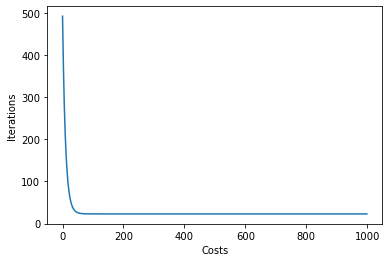

In [10]:
# Plotting the "cost function vs iterations" curve
import matplotlib.pyplot as plt
plt.xlabel("Costs")
plt.ylabel("Iterations")
plt.plot(range(iterations), costs_history[-1])
plt.show()

In [11]:
# performing grid search manually to find the optimal learning rate
lr_and_cost

[(0.01,
  array([-0.13750772,  0.80769985,  1.49136188,  2.5722886 , -0.50710116,
          0.36153521, -0.44081317,  1.91082409]),
  31.933858162048928,
  23.022602573147907),
 (0.02,
  array([-0.13032084,  0.81792559,  1.48944332,  2.57983545, -0.51747462,
          0.36199724, -0.44898211,  1.90600252]),
  31.935643909443666,
  23.02251262540519),
 (0.03,
  array([-0.13019662,  0.8181356 ,  1.4894145 ,  2.57992936, -0.5176197 ,
          0.36201445, -0.44911543,  1.90586254]),
  31.935649802730577,
  23.02251259897886),
 (0.04,
  array([-0.13019434,  0.81813937,  1.48941403,  2.57993089, -0.51762217,
          0.36201478, -0.44911788,  1.90585997]),
  31.935649907308303,
  23.022512598970422),
 (0.05,
  array([-0.1301943 ,  0.81813944,  1.48941402,  2.57993092, -0.51762221,
          0.36201479, -0.44911793,  1.90585992]),
  31.935649909174884,
  23.022512598970422)]

**In the above cell, we can see that the learning rate correspoding to the minimum cost is 0.01, therefore the optimal learning rate is 0.01**

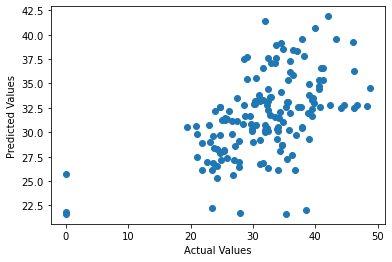

In [12]:
# plotting the "Predicted BMI value( 𝑌̂ 𝑖 )" vs "Actual BMI value( 𝑌𝑖 )" curve(it is a scatter plot)
# scatter plot for learning rate = 0.001
def predict(X, weights, bias):
    return np.dot(X, weights) + bias
y_pred = predict(x_test, lr_and_cost[0][1], lr_and_cost[0][2])
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.scatter(y_test, y_pred)

In [13]:
final_result = pd.DataFrame({"Actual BMI" : y_pred, "Predicted BMI": y_test})
final_result.to_csv("Gradient Descent CSV.csv")

In [14]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

43.612033055566044

In [15]:
# performing PCA on the dataset and reducing the dimensionality to 2 and train a new model on these newly obtained features.
from sklearn.decomposition import PCA
pca = PCA (n_components=1)
pca.fit(norm_X)
transformed_X = pca.transform(X)

norm_X_PCA = normalize_features(transformed_X)
x_train_PCA, x_test_PCA, y_train_PCA, y_test_PCA = train_test_split(norm_X_PCA, Y, test_size=0.2)
iterations_PCA = 1000
learning_rate_PCA = 0.01
weight_PCA, bias_PCA, costs_PCA = gradient_descent(x_train_PCA, y_train_PCA, np.zeros(x_train_PCA.shape[1]), 0, learning_rate_PCA, iterations_PCA)

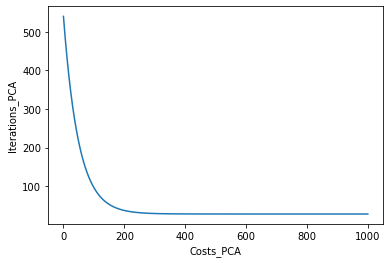

In [16]:
# plotting the "cost function vs iterations" curve for this new model.
plt.xlabel("Costs_PCA")
plt.ylabel("Iterations_PCA")
plt.plot(range(iterations), costs_PCA)
plt.show()

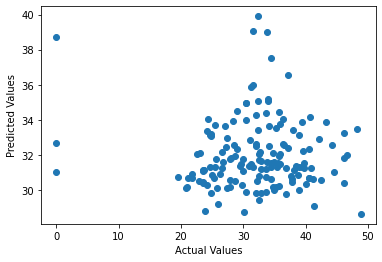

In [17]:
# plotting the "Predicted BMI value( 𝑌̂ 𝑖 ) of the new model" vs "Actual BMI value( 𝑌𝑖 )" curve(it is a scatter plot)
def predict(X, weights, bias):
    return np.dot(X, weights) + bias
y_pred_PCA = predict(x_test_PCA, weight_PCA, bias_PCA)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.scatter(y_test, y_pred_PCA)

<AxesSubplot:xlabel='PCA', ylabel='BMI'>

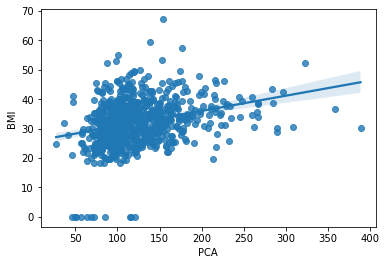

In [18]:
# showing the scatter plot of PCA generated new features and the linear regression curve that we got from the new model.
import seaborn as sns
result_PCA = pd.DataFrame({"PCA" : transformed_X.flatten(),"BMI" : Y})
sns.regplot(x = "PCA", y = "BMI", data = result_PCA)

In [19]:
final_result_PCA = pd.DataFrame({"Actual BMI" : y_pred_PCA, "Predicted BMI": y_test_PCA})
final_result_PCA.to_csv("PCA generated CSV.csv")